In [12]:
from sph_models.sph_models import core
import numpy as np
import matplotlib.pyplot as plt

## Plotting maps

We use the function "plot_tomo_map" to plot depth maps of tomographic models in sph format. A variety of sph format models exist in the "data/models" directory, including S40RTS (Ritsema et al. 2011), SEM-UCB (French and Romanowicz 2015), GYPSUM (Simmons et al. 2010). There are also a number of versions of S40RTS calculated with a varying number of eigenvectors. For example, 'S40.n=11289.sph' uses 11289 vectors, while the preferred model uses 8000.

In the example below, we plot S40RTS at 2800 km depth at maximum degrees of 40, 20, and 10. The function plot_tomo_map takes several arguments including the name of the sph format file (sph_file), the depth of the map (depth), the minimum and maximum values to use in the colorbar (vmin,vmax), and the minimum and maximum degree (lmin,lmax). S40RTS is parameterized using spherical harmonics up to degree 40. To plot a lowpass filtered version, set lmax to a lower degree. 

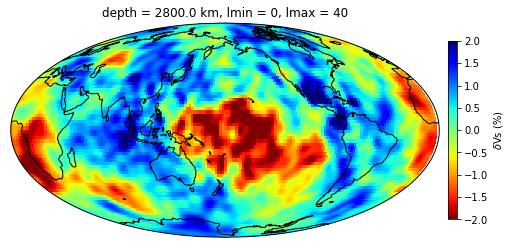

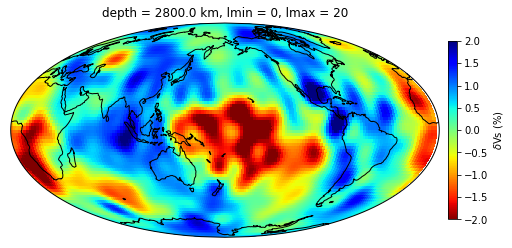

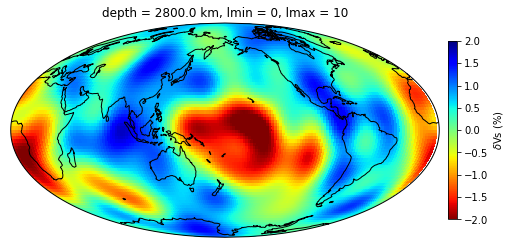

In [13]:
core.plot_tomo_map(sph_file='../data/models/S40RTS.sph',depth=2800.,vmin=-2.0,vmax=2.0,lmin=0,lmax=40)
core.plot_tomo_map(sph_file='../data/models/S40RTS.sph',depth=2800.,vmin=-2.0,vmax=2.0,lmin=0,lmax=20)
core.plot_tomo_map(sph_file='../data/models/S40RTS.sph',depth=2800.,vmin=-2.0,vmax=2.0,lmin=0,lmax=10)

### Extracting the values at a given depth

If we would rather only get the values instead of plotting a map, we can use the function "extract_dep_map". It works similar to plot_tomo_map, except the only inputs are the sph_model, the depth, and the minimum and maximum degree. The function returns lons,lats,and vals, where lons/lats are a meshgrid of longitudes and latitudes, and vals is the fractional velocity perturbation (not in percent!). See the example below to extract the values from SEM-UCB at 100 km depth.

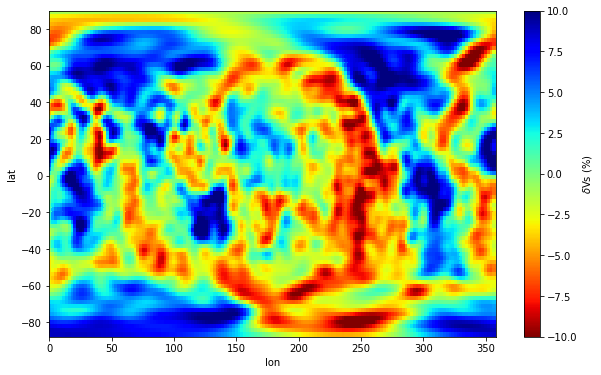

In [16]:
lons,lats,vals = core.extract_dep_map(sph_file='../data/models/SEM_WM_s.sph',depth=100.,lmin=0.,lmax=40.)
vals *= 100. #convert to percent

fig = plt.figure(figsize=[10,6])
plt.pcolormesh(lons,lats,vals,vmin=-10,vmax=10,cmap='jet_r')
plt.xlabel('lon')
plt.ylabel('lat')
plt.colorbar(label='$\delta$Vs (%)')